<a href="https://colab.research.google.com/github/javiagu13/DeepLearning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras
import matplotlib.pyplot as plt 

In [ ]:
#b)obtaining the dataset
fashion_mnist = keras.datasets.fashion_mnist
#c)splitting dataset
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


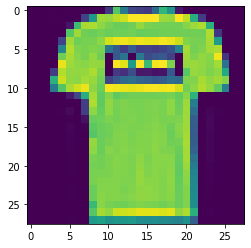

In [ ]:
#d) printing an image: its class is the T-shirt class
plt.imshow(train_images[1])

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([ 
keras.layers.Flatten(input_shape = (28, 28)),
keras.layers.Dense(2048, activation = tf.nn.relu),

keras.layers.Dense(10, activation = tf.nn.softmax)]) 

In [ ]:
#f)compiling model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 

In [ ]:

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('loss') < 0.01):
			print("\n Reached 99% accuracy, stopping")
			self.model.stop_training = True

callbacks = myCallback()

model.fit(train_images, train_labels,epochs=10,callbacks=[callbacks])
#7) no, i have not been able to reach 0.99 accuracy

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5981 - accuracy: 0.7982
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4620 - accuracy: 0.8408
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4353 - accuracy: 0.8501
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4226 - accuracy: 0.8554
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4141 - accuracy: 0.8572
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4074 - accuracy: 0.8598
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4017 - accuracy: 0.8601
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3984 - accuracy: 0.8619
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3946 - accuracy: 0.8629
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.391

In [ ]:
classifications = model.predict(test_images) 
print(classifications[0])
model.evaluate(test_images, test_labels) 
#the performance of the model is of 0.88, so yes it is good with unseen data
print(test_images.size)
print(train_images.size)

#inside test set 7840000 images
#inside training set 47040000 images

[8.4020569e-15 2.6497589e-17 2.8063911e-16 1.9135979e-21 4.4509719e-17
 4.8181471e-07 2.0770287e-17 4.7634261e-05 5.7239754e-17 9.9995184e-01]
313/313 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8817
7840000
47040000


313/313 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8817


[0.42365244030952454, 0.8816999793052673]

In [ ]:
model = keras.Sequential([ 
keras.layers.Flatten(input_shape = (28, 28)),
keras.layers.Dense(10, activation = tf.nn.softmax)]) 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) 
model.evaluate(test_images, test_labels) 
#the model without hidden layers gives a bad performance 0.06

313/313 [==============================] - 0s 1ms/step - loss: 2.5716 - accuracy: 0.0666


[2.5715701580047607, 0.066600002348423]